# In this notebook we visualize effects of inserting promoters

### We place a single CTCF and a promoter sequence symetrically 
### we monitor: 
- Effects of varying spacing
- Effects of varying ctcf flanks
- Effects from varying CTCF motif strengths
- Effects from specificity of promoter sequences

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns
# sns.set_theme()
import akita_utils.format_io

# Importing scores from simulations

In [2]:
h5_dirs = "/home1/kamulege/akita_utils/bin/insert_promoter_experiment/data/promoter_scores_all_ins/*/*.h5" # 
dfs = []
scd_stats = ["SCD","INS-16","INS-64"]

for h5_file in glob.glob(h5_dirs):
    dfs.append(akita_utils.h5_to_df(h5_file, scd_stats, drop_duplicates_key=None))
dfs = pd.concat(dfs)

for stat in scd_stats:
    dfs[f"mean_{stat}_score"] = (dfs[f"{stat}_h1_m1_t0"]+dfs[f"{stat}_h1_m1_t1"]+dfs[f"{stat}_h1_m1_t2"]+dfs[f"{stat}_h1_m1_t3"]+dfs[f"{stat}_h1_m1_t4"]+dfs[f"{stat}_h1_m1_t5"])/6

dfs

,INS-16_h1_m1_t0,INS-16_h1_m1_t1,INS-16_h1_m1_t2,INS-16_h1_m1_t3,INS-16_h1_m1_t4,INS-16_h1_m1_t5,INS-64_h1_m1_t0,INS-64_h1_m1_t1,INS-64_h1_m1_t2,INS-64_h1_m1_t3,...,insert_flank_bp,insert_loci,insert_strand,locus_orientation,out_folder,spacer_bp,swap_flanks,mean_SCD_score,mean_INS-16_score,mean_INS-64_score
0,-0.208618,-0.220703,-0.282471,-0.265137,-0.265869,-0.226807,-0.162720,-0.147461,-0.213257,-0.206909,...,0$0,"chr11,43766992,43767011$chr1,4856813,4857813",+$+,>>,data,0,all_for_strong,40.59375,-0.244995,-0.184204
1,-0.208618,-0.220703,-0.282471,-0.265137,-0.265869,-0.226807,-0.162720,-0.147461,-0.213257,-0.206909,...,0$0,"chr11,43766992,43767011$chr1,4856813,4857813",+$+,>>,data,0,all_for_weak,40.59375,-0.244995,-0.184204
2,-0.208618,-0.220703,-0.282471,-0.265137,-0.265869,-0.226807,-0.162720,-0.147461,-0.213257,-0.206909,...,0$0,"chr11,43766992,43767011$chr1,4856813,4857813",+$+,>>,data,0,no,40.59375,-0.244995,-0.184204
3,-0.208130,-0.223877,-0.292969,-0.278076,-0.278320,-0.231812,-0.169067,-0.158569,-0.222778,-0.214600,...,0$0,"chr11,43766992,43767011$chr1,4856813,4857813",+$+,<<,data,0,all_for_strong,42.18750,-0.252197,-0.192871
4,-0.208130,-0.223877,-0.292969,-0.278076,-0.278320,-0.231812,-0.169067,-0.158569,-0.222778,-0.214600,...,0$0,"chr11,43766992,43767011$chr1,4856813,4857813",+$+,<<,data,0,all_for_weak,42.18750,-0.252197,-0.192871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051,-0.157593,-0.147949,-0.226929,-0.221069,-0.209106,-0.189331,-0.120178,-0.075928,-0.157227,-0.163330,...,60$100,"chr2,166083960,166083979$chr1,4856813,4857813",-$+,<>,data,60,all_for_weak,38.78125,-0.192017,-0.132812
7052,-0.147705,-0.133545,-0.212036,-0.209229,-0.194946,-0.180176,-0.116089,-0.068787,-0.148315,-0.156372,...,60$100,"chr2,166083960,166083979$chr1,4856813,4857813",-$+,<>,data,60,no,38.75000,-0.179565,-0.126099
7053,-0.180542,-0.184204,-0.276611,-0.260986,-0.252197,-0.221313,-0.125977,-0.087036,-0.181152,-0.182373,...,60$100,"chr2,166083960,166083979$chr1,4856813,4857813",-$+,><,data,60,all_for_strong,38.96875,-0.229370,-0.148071
7054,-0.143921,-0.124878,-0.203369,-0.203857,-0.187744,-0.176270,-0.114380,-0.064758,-0.143921,-0.153564,...,60$100,"chr2,166083960,166083979$chr1,4856813,4857813",-$+,><,data,60,all_for_weak,38.50000,-0.173218,-0.123047


# General scores distribution

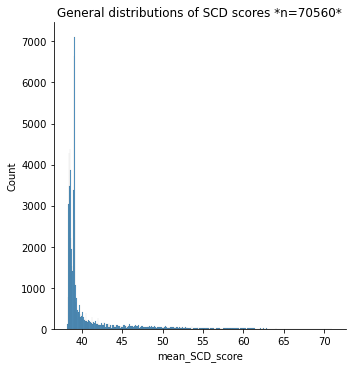

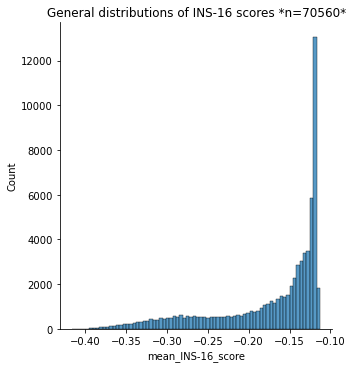

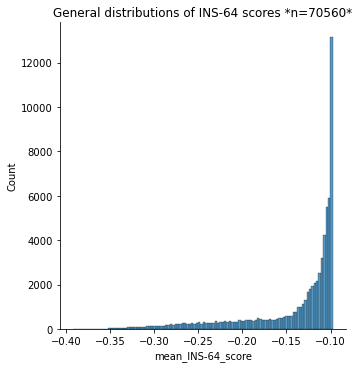

In [3]:
dfs.reset_index(drop=True, inplace=True)
dfs = dfs.loc[dfs["ctcf_genomic_score"]>10]# filtering out weak ctcf (need a way to find better weaker ctcf, these aint working)
# dfs = dfs.loc[dfs["gene_id"]=="ENSMUSG00000026003.5"]
dfs = dfs.loc[dfs["swap_flanks"]== "all_for_weak"]#] "weak_for_strong"
# sns.displot(dfs_1, x="mean_SCD_score")
for stat in scd_stats:
    sns.displot(dfs, x=f"mean_{stat}_score")
    plt.title(f"General distributions of {stat} scores *n={dfs.shape[0]}*")
    plt.show()

# Effect of different background seqs 

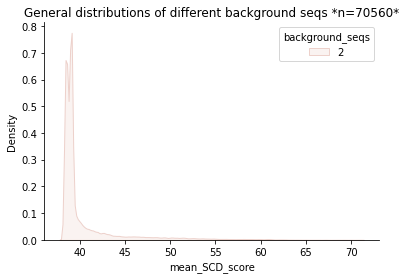

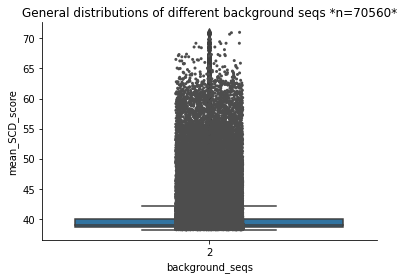

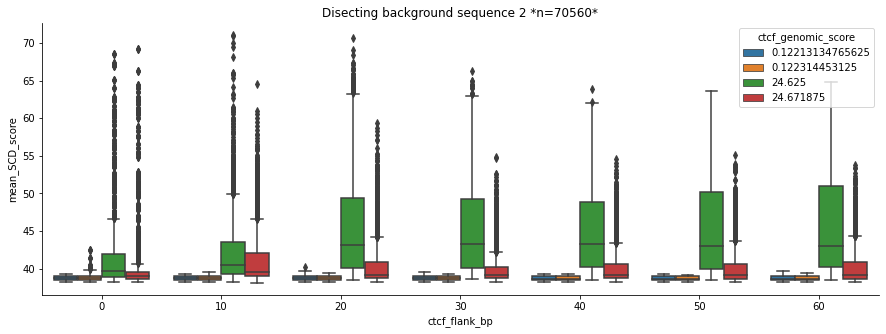

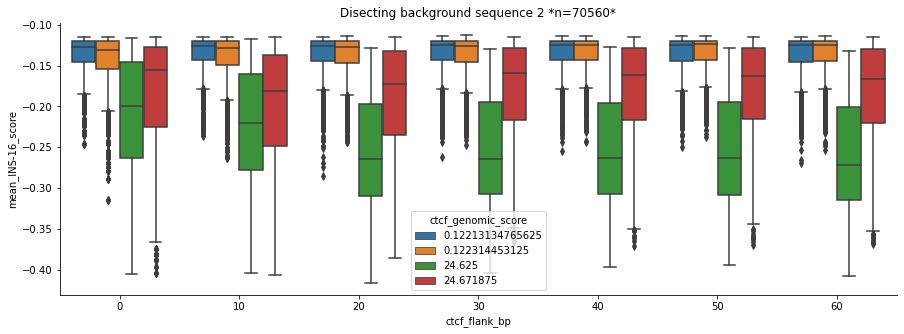

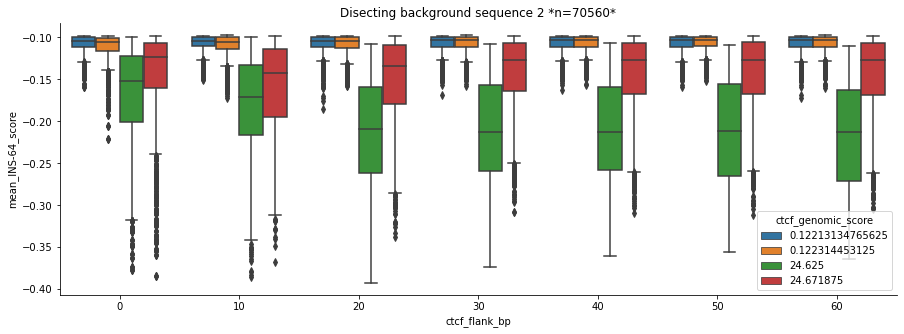

In [5]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="background_seqs", bw_adjust=.3, fill=True)
plt.title(f"General distributions of different background seqs *n={dfs.shape[0]}*")
sns.despine(top = True, right = True)
plt.show()

sns.boxplot(data=dfs, x='background_seqs', y="mean_SCD_score")
sns.stripplot(x="background_seqs", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different background seqs *n={dfs.shape[0]}*")
sns.despine(top = True, right = True)
plt.show()

for score in [2]:
    for stat in scd_stats:
        df_dummy_parameter = dfs.loc[dfs["background_seqs"]==score]
        plt.figure(figsize=(15,5))
        ax = sns.boxplot(data=df_dummy_parameter, x='ctcf_flank_bp', y=f"mean_{stat}_score", hue="ctcf_genomic_score")
        # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
        plt.title(f"Disecting background sequence {score} *n={df_dummy_parameter.shape[0]}*")
        sns.despine(top = True, right = True)
        # plt.ylim([35, 90])
        plt.show()
        plt.close()

# Effect of locus orientation

In [ ]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="locus_orientation", bw_adjust=.3, fill=True)
plt.title(f"Score distribution by locus orientation *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for stat in scd_stats:
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=dfs, x='locus_orientation', y=f"mean_{stat}_score", hue="ctcf_genomic_score")
    # sns.stripplot(x="locus_orientation", y=f"mean_{stat}_score", data=dfs, size=3, color=".3", linewidth=0)
    plt.title(f"Score distribution by locus orientation *n={dfs.shape[0]}* \n")
    sns.despine(top = True, right = True)
    plt.show()

# for score in [">>","<<","<>","><"]: #
#     df_dummy_parameter = dfs.loc[dfs["locus_orientation"]==score]  
#     plt.figure(figsize=(15,5))
#     ax = sns.boxplot(data=df_dummy_parameter, x='ctcf_flank_bp', y="mean_SCD_score", hue="ctcf_genomic_score") # palette='viridis_r',
#     # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
#     plt.title(f"Disecting {score} locus orientation *n={df_dummy_parameter.shape[0]}* \n")
#     sns.despine(top = True, right = True)
#     # plt.ylim([35, 100])
#     plt.show()
#     plt.close()
    
    
#     I used this to see how genes are affected each orientation and flank
 
    # for flank in [i for i in range(0,101,20)]:
    #     df_dummy_parameter_1 = df_dummy_parameter.loc[dfs["gene_flank_bp"]==flank]
    #     sns.boxplot(data=df_dummy_parameter_1, x='ctcf_flank_bp', y="mean_SCD_score", hue="ctcf_genomic_score")
    #     # sns.stripplot(x="swap_flanks", y="mean_SCD_score", data=df_dummy_parameter_1, size=3, color=".3", linewidth=0)
    #     plt.title(f"Disecting {flank} flanking basepairs following{score} *n={df_dummy_parameter_1.shape[0]}*")
    #     # plt.ylim([35, 100])
    #     plt.show()
    #     plt.close()

# Effect of CTCF flank basepairs

In [ ]:
# flank_bp = 

sns.kdeplot(data=dfs, x="mean_SCD_score", hue="ctcf_flank_bp", bw_adjust=.3, fill=True, palette='viridis_r')
plt.title(f"General distributions of different flanking basepairs *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for stat in scd_stats:
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=dfs, x='ctcf_flank_bp', y=f"mean_{stat}_score", hue="ctcf_genomic_score")#palette='viridis_r', , hue="gene_id"
    # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
    plt.title(f"General distributions of {stat} scores for different flanking basepairs *n={dfs.shape[0]}* \n")
    sns.despine(top = True, right = True)
    plt.show()

for score in [i for i in range(0,61,10)]:#[i for i in range(0,501,100)]:# 
    df_dummy_parameter = dfs.loc[dfs["ctcf_flank_bp"]==score]
    # with sns.set_style("whitegrid"):
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=df_dummy_parameter, x='spacer_bp', y="mean_SCD_score", hue="ctcf_genomic_score")
    # sns.stripplot(x="spacer_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting {score} flanking basepairs *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True, left=True)
    # plt.ylim([35, 100])
    plt.show()
    plt.close()

# Effect of gene flank basepairs

In [ ]:
# flank_bp = 

sns.kdeplot(data=dfs, x="mean_SCD_score", hue="gene_flank_bp", bw_adjust=.3, fill=True, palette='viridis_r')
plt.title(f"General distributions of different flanking basepairs *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for stat in scd_stats:
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=dfs, x='gene_flank_bp', y=f"mean_{stat}_score", palette='viridis_r', hue="ctcf_genomic_score")#,hue=""
    # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
    plt.title(f"General distributions of different flanking basepairs *n={dfs.shape[0]}* \n")
    sns.despine(top = True, right = True)
    plt.show()

# for score in [i for i in range(0,101,20)]:#[i for i in range(0,501,100)]:# 
#     df_dummy_parameter = dfs.loc[dfs["gene_flank_bp"]==score]
#     # with sns.set_style("whitegrid"):
#     plt.figure(figsize=(15,5))
#     ax = sns.boxplot(data=df_dummy_parameter, x='ctcf_flank_bp', y="mean_SCD_score", hue="ctcf_genomic_score")
#     # sns.stripplot(x="spacer_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
#     plt.title(f"Disecting {score} flanking basepairs *n={df_dummy_parameter.shape[0]}* \n")
#     sns.despine(top = True, right = True, left=True)
#     # plt.ylim([35, 70])
#     plt.show()
#     plt.close()

# Effect of swaping flank basepairs

In [ ]:
# flank_bp = 

# sns.kdeplot(data=dfs, x="mean_SCD_score", hue="swap_flanks", bw_adjust=.3, fill=True, palette='viridis_r')
# plt.title(f"General distributions of different flanking basepairs *n={dfs.shape[0]}* \n")
# sns.despine(top = True, right = True)
# plt.show()

# sns.boxplot(data=dfs, x='swap_flanks', y="mean_SCD_score", palette='viridis_r')
# # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
# plt.title(f"General distributions of different flanking basepairs *n={dfs.shape[0]}* \n")
# sns.despine(top = True, right = True)
# plt.show()

# for score in ["weak_for_strong","strong_for_weak"]:#[i for i in range(0,501,100)]:# 
#     df_dummy_parameter = dfs.loc[dfs["swap_flanks"]==score]
#     # with sns.set_style("whitegrid"):

#     sns.boxplot(data=df_dummy_parameter, x='gene_flank_bp', y="mean_SCD_score")
#     # sns.stripplot(x="spacer_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
#     plt.title(f"Disecting {score} flanking basepairs *n={df_dummy_parameter.shape[0]}* \n")
#     sns.despine(top = True, right = True, left=True)
#     # plt.ylim([35, 70])
#     plt.show()
#     plt.close()

# Effect of spacing basepairs

In [ ]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="spacer_bp", bw_adjust=.3, fill=True, palette='viridis_r')
plt.title(f"General distributions of different spacing basepairs *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for stat in scd_stats:
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=dfs, x='spacer_bp', y=f"mean_{stat}_score", palette='viridis_r', hue="ctcf_genomic_score")
    # sns.stripplot(x="spacer_bp", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
    plt.title(f"General distributions of different spacing basepairs *n={dfs.shape[0]}* \n")
    sns.despine(top = True, right = True)
    plt.show()

# for score in [i for i in range(0,61,10)]: 
#     df_dummy_parameter = dfs.loc[dfs["spacer_bp"]==score]
#     plt.figure(figsize=(15,5))
#     ax = sns.boxplot(data=df_dummy_parameter, x='ctcf_flank_bp', y="mean_SCD_score", palette='viridis_r', hue="ctcf_genomic_score")
#     # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0, hue="ctcf_genomic_score")
#     plt.title(f"Disecting {score} spacing basepairs *n={df_dummy_parameter.shape[0]}* \n")
#     sns.despine(top = True, right = True)
#     # plt.ylim([35, 100])
#     plt.show()
#     plt.close()

# Attempt to fish possible influencial genes

In [ ]:
g = sns.PairGrid(dfs, vars=["mean_SCD_score", "ctcf_flank_bp"],height=4) # , hue="enhancer_locus_specification"
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [ ]:
for score in [">>","<<","<>","><"]: #
    data_1 = dfs.loc[dfs["locus_orientation"]==score]
    cutt_off = 0
    sns.jointplot(data=data_1.loc[data_1["mean_SCD_score"]>cutt_off], y=f"mean_SCD_score", x = "ctcf_flank_bp",hue="gene_symbol",height=8) #  
    plt.title(f"genes distribution for {score} flanking basepairs")

# Follow up on the possible influencial genes

In [ ]:
for special_gene in ["Tcea1", "Cflar"]: #"ENSMUSG00000094571.1","ENSMUSG00000107222.1","ENSMUSG00000107185.1","ENSMUSG00000106945.1","ENSMUSG00000001376.17","ENSMUSG00000107233.1"]:
    for score in [">>","<<","<>","><"]: 
        for stat in scd_stats:
            data_1 = dfs.loc[dfs["locus_orientation"]==score]
            data_2 = data_1.loc[data_1["gene_symbol"]==special_gene]
            # data_3 = dfs.loc[dfs["spacer_bp"]==20]
            plt.figure(figsize=(15,5))
            ax = sns.boxplot(data=data_2, y=f"mean_{stat}_score", x = "ctcf_flank_bp", hue="ctcf_genomic_score")
            plt.title(f"Gene *{special_gene}* analysis for {score} orientation *n={data_2.shape[0]}* \n")
            sns.despine(top = True, right = True)
            dt=[i for i in range(0,8,1)]
            # plt.plot(dt,[45]*(len(dt)),color='r')
            # plt.ylim([35, 60])
            plt.show()
            plt.close()
    print("*****************************************\n \n \n \n \n")

In [ ]:
# df_3d = pd.DataFrame()
# df_3d['x'] = dfs['flank_bp']
# df_3d['y'] = dfs['spacer_bp']
# df_3d['z'] = dfs['locus_orientation']

# sns.pairplot(df_3d)

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter3D(dfs['flank_bp'].values.tolist(),dfs['spacer_bp'].values.tolist(),dfs['locus_orientation'].values.tolist())

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points
zdata = dfs["mean_SCD_score"]
xdata = dfs['spacer_bp']
ydata = dfs['ctcf_flank_bp']

ax.set_zlabel('mean_SCD_score')
ax.set_xlabel('spacer_bp')
ax.set_ylabel('ctcf_flank_bp')
# ax.set_zscale('log')

# get colormap from seaborn
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("tab10").as_hex())

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap =cmap)

In [ ]:
# Test input
from akita_utils.program_setup import Locus, Gene, CTCF, create_insertions_sequences, genome_open

test_locus = Locus([CTCF,Gene])
    
test_locus.insert(Gene("rat_1",'chr11',22206811,22206830,'+'))
test_locus.insert(CTCF("rat_2",'chr11',22206811,22206830,[0,0],'+'))


# Expected output
expected_output = [np.array([[1, 0, 0, 0],
                             [0, 0, 0, 1],
                             [0, 0, 1, 0],
                             [0, 1, 0, 0]]),  # one-hot encoded DNA sequence for Element 1
                   np.array([[1, 0, 0, 0],  # one-hot encoded DNA sequence for left flank of CTCF element
                             [0, 0, 0, 1],
                             [0, 0, 1, 0],
                             [0, 1, 0, 0],
                             [0, 0, 1, 0],  # one-hot encoded DNA sequence for CTCF element
                             [0, 1, 0, 0],
                             [1, 0, 0, 0],  # one-hot encoded DNA sequence for right flank of CTCF element
                             [0, 0, 0, 1]])]

# Test
output = create_insertions_sequences(test_locus, genome_open())

expected_output == output

# akita_utils.dna_utils.dna_1hot(genome_open().fetch('chr11',22206811,22206811))

# print(CTCF("rat_1",'chr11',22206811,22206830,[1,1],'+'))

In [ ]:
from akita_utils.program_setup import LOCUS, INSERT, create_insertions_sequences, genome_open
from akita_utils.seq_gens import create_insertion, _multi_insert_casette
motifs_file_test = "/home1/kamulege/akita_utils/bin/insert_promoter_experiment/data/parameters_combo_test_1.tsv"
background_file = "/project/fudenber_735/tensorflow_models/akita/v2/analysis/background_seqs.fa"
seq_coords_df = pd.read_csv(motifs_file_test, sep="\t")

background_seqs = []
with open(background_file, "r") as f:
    for line in f.readlines():
        if ">" in line:
            continue
        background_seqs.append(akita_utils.dna_utils.dna_1hot(line.strip()))

            
            
def modular_insertion_seqs_gen(seq_coords_df, background_seqs, genome_open):
    collection = []
    for s in seq_coords_df.itertuples():
        seq_1hot_insertions = []
        spacer_bp = s.spacer_bp
        orientation_string = s.locus_orientation
        seq_1hot = background_seqs[s.background_seqs].copy()        

        for module_number in range(len(s.insert_strand.split("$"))):
            locus = s.insert_loci.split("$")[module_number]
            flank_bp = int(s.insert_flank_bp.split("$")[module_number])
            chrom,start,end = locus.split(",")
            seq_1hot_insertion = akita_utils.dna_utils.dna_1hot(genome_open.fetch(chrom, int(start) - flank_bp, int(end) + flank_bp).upper())
            if s.insert_strand.split("$")[module_number] == "-":
                seq_1hot_insertion = akita_utils.dna_utils.hot1_rc(seq_1hot_insertion)
            seq_1hot_insertions.append(seq_1hot_insertion)

        seq_1hot = _multi_insert_casette(seq_1hot, seq_1hot_insertions, spacer_bp, orientation_string)
        collection += [seq_1hot]
    return collection, seq_1hot_insertions


def flexible_flank_modular_insertion_seqs_gen(seq_coords_df, background_seqs, genome_open):
    collection = []
    for s in seq_coords_df.itertuples():
        spacer_bp = s.spacer_bp
        orientation_string = s.locus_orientation
        seq_1hot = background_seqs[s.background_seqs].copy()        
        custom_locus = LOCUS([INSERT])
        swapping_flanks = s.swap_flanks  # whether/how we are swapping flanks
        ctcf_score = s.ctcf_genomic_score
        
        for module_number in range(len(s.insert_strand.split("$"))):
            # figuring out a way to tell if module is a ctcf or gene, currently it is easy to tell from tsv
            locus = s.insert_loci.split("$")[module_number]
            chrom,start,end = locus.split(",")
            flank_bp = int(s.insert_flank_bp.split("$")[module_number])
            strand = s.insert_strand.split("$")[module_number]
            insert = create_insertion(module_number, locus, strand, flank_bp, ctcf_score, swapping_flanks)
            custom_locus.insert(insert)

        seq_1hot_insertions = create_insertions_sequences(custom_locus, genome_open)
        seq_1hot = _multi_insert_casette(seq_1hot, seq_1hot_insertions, spacer_bp, orientation_string)
        collection += [seq_1hot]
    return collection, seq_1hot_insertions

In [ ]:
result_1,seq_1 = modular_insertion_seqs_gen(seq_coords_df, background_seqs, genome_open())
result_2,seq_2 = flexible_flank_modular_insertion_seqs_gen(seq_coords_df, background_seqs, genome_open())

np.all(result_1) ==np.all(result_2)

In [ ]:
print(len(seq_1[0])) 
print(len(seq_2[0]))

In [ ]:
seq_coords_df

# HOMEWORK FOR SCD OF CTCF

In [ ]:
import pandas as pd
ctcf_df = pd.read_csv('/project/fudenber_735/motifs/hg38/jaspar/MA0139.1.tsv.gz', compression='gzip', 
                                  header=0, sep='\t')


In [ ]:
ctcf_df .set_axis(['chrom', 'start', 'end', 'motif', 'A', 'B', 'strand'], axis='columns', inplace=True)

ctcf_df

In [ ]:
df = pd.read_csv("/project/fudenber_735/GEO/Krietenstein2019/sameer_remap/features/U54-HFFc6-FA-DSG-MNase-R1-R3.hg38.mapq_30.10000.window_200000.insulation", header=0, sep='\t')

df

In [ ]:
df = df.loc[True == (df["is_boundary_200000"] == True)]
df

In [ ]:
import bioframe as bf
overlapping_intervals = bf.overlap(ctcf_df, df, how='inner', suffixes=('','_2'))
display(overlapping_intervals)

In [ ]:
import glob
# h5_dirs = "/project/fudenber_735/tensorflow_models/akita/v2/analysis/permute_boundaries_motifs_ctcf_mm10_model*/scd.h5"
h5_dirs = "/home1/kamulege/akita_utils/bin/disrupt_genomic_boundary_ctcfs/scd_human_ctcf/*/*.h5" # 
dfs = []
scd_stats = ["INS-16","INS-32","INS-64","INS-128","INS-256","SCD","SSD"]

for h5_file in glob.glob(h5_dirs):
    dfs.append(akita_utils.format_io.h5_to_df(h5_file)) # ,drop_duplicates_key=None
dfs = pd.concat(dfs)

dfs            

In [ ]:
len(overlapping_intervals.loc[True == (overlapping_intervals["SCD_1"] > 0.3)])

In [ ]:


plt.figure(figsize=(15,5))
ax = sns.kdeplot(data=overlapping_intervals["SCD_1"])

# plt.figure(figsize=(15,5))
# ax = sns.kdeplot(data=dfs["SSD"])

In [ ]:
df

In [ ]:
import bioframe as bf

In [ ]:
bf.is_bedframe(df)